In [33]:
""" RotSym v2 is here to prevent solution that are not only a symmetry or a rotation
    but also that a part of the puzzle have just been rotated (it is limited tho)

Let's have two 2D map :
A) 1122 B) 4433
   4433    4433
   4433    4433
   4433    2211
   
The actual formula consider these two pieces as different.
    If we were not able to differenciate the same pieces (1 with 2 and 3 with 4) we could say that A and B are just symmetric.
    
But in this case the formula is not able to see this because the interaction between pieces have changed.
Because the actual formula uses interactions between pieces to work, it considers these two matrix as different.

To fix this we need to consider 1 and 2 as the same piece as well as 3 and 4.
There is still a little difficulty, let's have four new matrix :
C) 11 D) 13 E) 11 F) 11
   22    13    23    22
   33    24    23    34
   44    24    44    34

These four matrix are ALL different and need to stay different with the formula.
    If you consider 1,2,3 and 4 as the same piece (or same value) you will not see the difference between these matrix

The idea to this is either change the formula (that might work) OR add another formula (might work better but is slower)
The algorithm will just change how interactions works by saying :
    if two adjacent blocks have same id stock result in array[1]
    if two adjacent blocks have not the same id stock result in array[0]
    return array[0]*array[1]

It should work, I think, maybe ...

"""

import numpy as np

sum_list = [0,1,3,6,10,15,21,28]

""" def protsym_2D(piece_map, piece_map_id):
    map_cost = [0,0]
    interact = 0
    len0 = len(piece_map)
    len1 = len(piece_map[0])
    for i in range(len0):
        for j in range(len1):
            interact = 0
            save = interact
            if i > 0:
                map_cost[0] += (piece_map_id[i][j]+1)*(piece_map_id[i-1][j]+1)
                interact += (piece_map_id[i][j] == piece_map_id[i-1][j] and piece_map[i][j] != piece_map[i-1][j])
                if interact != save:
                    print(piece_map[i][j], piece_map[i-1][j], interact)
                    save = interact
            if j > 0:
                map_cost[0] += (piece_map_id[i][j]+1)*(piece_map_id[i][j-1]+1)
                interact += (piece_map_id[i][j] == piece_map_id[i][j-1] and piece_map[i][j] != piece_map[i][j-1])
                if interact != save:
                    print(piece_map[i][j], piece_map[i][j-1], interact)
                    save = interact
            if i < len0-1:
                interact += (piece_map_id[i][j] == piece_map_id[i+1][j] and piece_map[i][j] != piece_map[i+1][j])
                if interact != save:
                    print(piece_map[i][j], piece_map[i+1][j], interact)
                    save = interact
            if j < len1-1:
                interact += (piece_map_id[i][j] == piece_map_id[i][j+1] and piece_map[i][j] != piece_map[i][j+1])
                if interact != save:
                    print(piece_map[i][j], piece_map[i][j+1], interact)
                    save = interact
            map_cost[1] += interact
    
    return map_cost[0] * map_cost[1] """

""" def rotsym_2D(piece_map, piece_map_id):
    map_cost = [0,0]
    interact = [0,0]
    len0 = len(piece_map)
    len1 = len(piece_map[0])
    for i in range(len0):
        for j in range(len1):
            interact = [0,0]
            if i > 0:
                map_cost[0] += (piece_map_id[i][j]+1)*(piece_map_id[i-1][j]+1)
                interact[0] += (piece_map_id[i][j] == piece_map_id[i-1][j] and piece_map[i][j] != piece_map[i-1][j]) * (interact[0]+1)
            if j > 0:
                map_cost[0] += (piece_map_id[i][j]+1)*(piece_map_id[i][j-1]+1)
                interact[1] += (piece_map_id[i][j] == piece_map_id[i][j-1] and piece_map[i][j] != piece_map[i][j-1]) * (interact[1]+1)
            if i < len0-1:
                interact[0] += (piece_map_id[i][j] == piece_map_id[i+1][j] and piece_map[i][j] != piece_map[i+1][j]) * (interact[0]+1)
            if j < len1-1:
                interact[1] += (piece_map_id[i][j] == piece_map_id[i][j+1] and piece_map[i][j] != piece_map[i][j+1]) * (interact[1]+1)

            map_cost[1] += interact[0] + interact[1]

    return map_cost[0] * map_cost[1]"""

def trotsym_2D(p_map, p_map_id):
    map_cost = 0
    interact = np.zeros((4,4))
    len0 = len(p_map) #replace with self.shape
    len1 = len(p_map[0])
    for i in range(len0):
        for j in range(len1):
            if i > 0:
                map_cost += (p_map_id[i][j]+1)*(p_map_id[i-1][j]+1)
                if p_map_id[i][j] == p_map_id[i-1][j] and p_map[i][j] != p_map[i-1][j]:
                    interact[p_map[i][j]-1, p_map[i-1][j]-1] += 1
            if j > 0:
                map_cost += (p_map_id[i][j]+1)*(p_map_id[i][j-1]+1)
                if p_map_id[i][j] == p_map_id[i][j-1] and p_map[i][j] != p_map[i][j-1]:
                    interact[p_map[i][j]-1, p_map[i][j-1]-1] += 1
    
    total = 1
    for i in range(4):
        for j in range(i+1, 4):
            #print(i,j, int(interact[i][j]), int(interact[j][i]))
            total += sum_list[int(interact[i][j] + interact[j][i])]
    
    print(interact)
    return map_cost * total


In [30]:
""" Unit test
We consider the formula working for all situations, even in 3D, if and only if these tests return all true """

def unit_test(ref, ref_id, cmpr, cmpr_id, torf):
    count = 0
    for i,j,k,l,n in zip(ref, ref_id, cmpr, cmpr_id, torf):
        count += 1
        res_ref = trotsym_2D(i, j)
        res_cmpr = trotsym_2D(k, l)
        is_true = (res_ref == res_cmpr)
        print(count,":",res_ref, res_cmpr, (is_true == n),"\n")

ref = []
ref_id = []
cmpr = []
cmpr_id = []
torf = []

""" 1) 'Symetric + swap' Return True
A) 1122 B) 4433
   4433    4433
   4433    4433
   4433    2211 """
ref.append([[1,1,2,2],[4,4,3,3],[4,4,3,3],[4,4,3,3]])
ref_id.append([[1,1,1,1],[2,2,2,2],[2,2,2,2],[2,2,2,2]])
cmpr.append([[4,4,3,3],[4,4,3,3],[4,4,3,3],[2,2,1,1]])
cmpr_id.append([[2,2,2,2],[2,2,2,2],[2,2,2,2],[1,1,1,1]])
torf.append(True)

""" 2) 'Different Arrangement' Return False
A) 1122 B) 1133
   4433    4433
   4433    4433
   4433    4422 """
ref.append([[1,1,2,2],[4,4,3,3],[4,4,3,3],[4,4,3,3]])
ref_id.append([[1,1,1,1],[2,2,2,2],[2,2,2,2],[2,2,2,2]])
cmpr.append([[1,1,3,3],[4,4,3,3],[4,4,3,3],[4,4,2,2]])
cmpr_id.append([[1,1,2,2],[2,2,2,2],[2,2,2,2],[2,2,1,1]])
torf.append(False)

""" 3) 'Different Arrangement' Return False
A) 11 B) 13
   22    13
   33    24
   44    24 """
ref.append([[1,1],[2,2],[3,3],[4,4]])
ref_id.append([[1,1],[1,1],[1,1],[1,1]])
cmpr.append([[1,3],[1,3],[2,4],[2,4]])
cmpr_id.append([[1,1],[1,1],[1,1],[1,1]])
torf.append(False)

""" 4) 'Different Arrangement' Return False
A) 11 B) 11
   22    23
   33    23
   44    44 """
ref.append([[1,1],[2,2],[3,3],[4,4]])
ref_id.append([[1,1],[1,1],[1,1],[1,1]])
cmpr.append([[1,1],[2,3],[2,3],[4,4]])
cmpr_id.append([[1,1],[1,1],[1,1],[1,1]])
torf.append(False)

""" 5) 'Different Arrangement' Return False
A) 11 B) 11
   22    22
   33    34
   44    34 """
ref.append([[1,1],[2,2],[3,3],[4,4]])
ref_id.append([[1,1],[1,1],[1,1],[1,1]])
cmpr.append([[1,1],[2,2],[3,4],[3,4]])
cmpr_id.append([[1,1],[1,1],[1,1],[1,1]])
torf.append(False)

""" 6) 'Swap' Return True
A) 122 B) 211
   112    221
   333    333 """
ref.append([[1,2,2],[1,1,2],[3,3,3]])
ref_id.append([[1,1,1],[1,1,1],[2,2,2]])
cmpr.append([[2,1,1],[2,2,1],[3,3,3]])
cmpr_id.append([[1,1,1],[1,1,1],[2,2,2]])
torf.append(True)

""" 7) 'Symetric' Return True
A) 122 B) 221
   112    211
   333    333 """
ref.append([[1,2,2],[1,1,2],[3,3,3]])
ref_id.append([[1,1,1],[1,1,1],[2,2,2]])
cmpr.append([[2,2,1],[2,1,1],[3,3,3]])
cmpr_id.append([[1,1,1],[1,1,1],[2,2,2]])
torf.append(True)

""" 8) 'Rotation 90 + Symetric' Return True
A) 122 B) 113
   112    213
   333    223 """
ref.append([[1,2,2],[1,1,2],[3,3,3]])
ref_id.append([[1,1,1],[1,1,1],[2,2,2]])
cmpr.append([[1,1,3],[2,1,3],[2,2,3]])
cmpr_id.append([[1,1,2],[1,1,2],[1,1,2]])
torf.append(True)

""" 9) 'Symetric + swap' Return True
A) 122 B) 112
   112    122
   333    333 """
ref.append([[1,2,2],[1,1,2],[3,3,3]])
ref_id.append([[1,1,1],[1,1,1],[2,2,2]])
cmpr.append([[1,1,2],[1,2,2],[3,3,3]])
cmpr_id.append([[1,1,1],[1,1,1],[2,2,2]])
torf.append(True)
   
""" 10) 'Rotation 90 + Symetric + swap' Return True
A) 122 B) 311
   112    321
   333    322 """
ref.append([[1,2,2],[1,1,2],[3,3,3]])
ref_id.append([[1,1,1],[1,1,1],[2,2,2]])
cmpr.append([[3,1,1],[3,2,1],[3,2,2]])
cmpr_id.append([[2,1,1],[2,1,1],[2,1,1]])
torf.append(True)
   
""" 11) 'Different Arrangement' Return False
A) 1122 B) 5522
   1552    5512
   3554    3114
   3344    3344 """
ref.append([[1,1,2,2],[1,5,5,2],[3,5,5,4],[3,3,4,4]])
ref_id.append([[1,1,1,1],[1,2,2,1],[1,2,2,1],[1,1,1,1]])
cmpr.append([[5,5,2,2],[5,5,1,2],[3,1,1,4],[3,3,4,4]])
cmpr_id.append([[2,2,1,1],[2,2,1,1],[1,1,1,1],[1,1,1,1]])
torf.append(False)

unit_test(ref, ref_id, cmpr, cmpr_id, torf)

[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  3.]
 [ 0.  0.  0.  0.]]
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  3.]
 [ 0.  0.  0.  0.]]
1 : 1512 1512 True 

[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  3.]
 [ 0.  0.  0.  0.]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  2.]
 [ 0.  0.  0.  0.]]
2 : 1512 752 True 

[[ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2.  0.]]
[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  2.  1.  0.]]
3 : 400 360 True 

[[ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2.  0.]]
[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  2.  0.  0.]
 [ 0.  1.  1.  0.]]
4 : 400 320 True 

[[ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  2.  0.]]
[[ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  2.  0.]]
5 : 400 360 True 

[[ 0.  1.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  2.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.

In [60]:
""" 3D rotsym
Now we got our function working in 2D, let's add the last dimension
We just need to take the logic of the formula and expend it to the third D

"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_list = ["#FF0000CC", "#00FF00CC", "#0000FFCC", "#FF00FFCC", \
              "#FFFF00CC", "#00FFFFCC", "#000000CC", "#FFFFFFCC", \
              "#888888CC", "#444444CC", "#BBBBBBCC"]

def print_3D(piece_map, view_3D=False):
        %matplotlib inline
        
        piece_map = np.asarray(piece_map)
        x, y, z = np.indices(piece_map.shape)
        voxels = (piece_map != 0)
        #print(voxels)
        colors = np.empty(voxels.shape, dtype=object)
        for i in range(piece_map.shape[0]):
            for j in range(piece_map.shape[1]):
                for k in range(piece_map.shape[2]):
                    value = int(piece_map[i,j,k])
                    if value > 0:
                        colors[i,j,k] = color_list[value - 1]
        
        fig = plt.figure(figsize=(2,2))
        ax = fig.gca(projection='3d')
        ax.voxels(voxels, facecolors=colors, edgecolor='k')
        plt.show()

def unit_test_3D(ref, ref_id, cmpr, cmpr_id, torf):
    count = 0
    res_ref = rotsym_3D(ref, ref_id)
    for i,j,k in zip(cmpr, cmpr_id, torf):
        count += 1
        res_cmpr = rotsym_3D(i, j)
        is_true = (res_ref == res_cmpr)
        print(count,":",res_ref, res_cmpr, (is_true == k),"\n")

def rotsym_3D(p_map, p_map_id):
    map_cost = 0
    interact = np.zeros((2,4,4))
    len0 = len(p_map) #replace with self.shape
    len1 = len(p_map[0])
    len2 = len(p_map[0][0])
    for i in range(len0):
        for j in range(len1):
            for k in range(len2):
                if i > 0:
                    map_cost += (p_map_id[i][j][k]+1)*(p_map_id[i-1][j][k]+1)
                    if p_map_id[i][j][k] == p_map_id[i-1][j][k] and p_map[i][j][k] != p_map[i-1][j][k]:
                        interact[p_map_id[i][j][k]-1, p_map[i][j][k]-1, p_map[i-1][j][k]-1] += 1
                if j > 0:
                    map_cost += (p_map_id[i][j][k]+1)*(p_map_id[i][j-1][k]+1)
                    if p_map_id[i][j][k] == p_map_id[i][j-1][k] and p_map[i][j][k] != p_map[i][j-1][k]:
                        interact[p_map_id[i][j][k]-1, p_map[i][j][k]-1, p_map[i][j-1][k]-1] += 1
                if k > 0:
                    map_cost += (p_map_id[i][j][k]+1)*(p_map_id[i][j][k-1]+1)
                    if p_map_id[i][j][k] == p_map_id[i][j][k-1] and p_map[i][j][k] != p_map[i][j][k-1]:
                        interact[p_map_id[i][j][k]-1, p_map[i][j][k]-1, p_map[i][j][k-1]-1] += 1
    print(interact)
    total = [1,1]
    for k in range(2):
        for i in range(4):
            for j in range(i+1, 4):
                #print(i,j, int(interact[i][j]), int(interact[j][i]))
                total[k] += sum_list[int(interact[k][i][j] + interact[k][j][i])]
    
    #print(interact)
    return map_cost * total[0] * total[1]

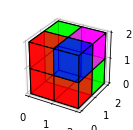

[[[ 0.  0.  0.  0.]
  [ 3.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  1.  0.]]]
854


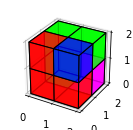

[[[ 0.  0.  0.  0.]
  [ 2.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]
240


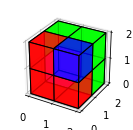

[[[ 0.  0.  0.  0.]
  [ 2.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]
240


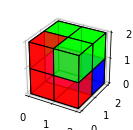

[[[ 0.  0.  0.  0.]
  [ 3.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  1.]
  [ 0.  0.  0.  0.]]]
854


In [61]:
cube_ref    = [[[1,1],[2,2]],[[1,3],[2,4]]]
cube_ref_id = [[[1,1],[1,1]],[[1,2],[1,2]]]
cube_cmpr = []
cube_cmpr_id = []
torf = []

cube_cmpr.append(   [[[1,1],[2,2]],[[1,3],[4,2]]])
cube_cmpr_id.append([[[1,1],[1,1]],[[1,2],[2,1]]])

cube_cmpr.append(   [[[1,1],[4,2]],[[1,3],[2,2]]])
cube_cmpr_id.append([[[1,1],[2,1]],[[1,2],[1,1]]])

cube_cmpr.append(   [[[1,1],[4,2]],[[1,2],[3,2]]])
cube_cmpr_id.append([[[1,1],[2,1]],[[1,1],[2,1]]])

print_3D(cube_ref)
print(rotsym_3D(cube_ref, cube_ref_id))
for i,j in zip(cube_cmpr, cube_cmpr_id):
    print_3D(i)
    print(rotsym_3D(i, j))